In [114]:
import os
import pandas as pd
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
os.chdir(r'C:\Users\formy\Documents\Kaggle\Housing Prices')

In [134]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [135]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [118]:

cols = train.select_dtypes(include=['object']).columns.tolist()
    
col_index = [train.columns.get_loc(c) for c in cols if c in train]
    

In [136]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E8944B748>]],
      dtype=object)

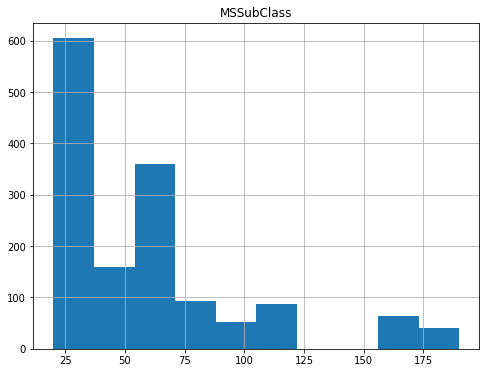

In [120]:
#%matplotlib inline# This line is only required in jupyter notebook
train.hist(column=['MSSubClass'],bins=10, figsize=(8,6))

In [121]:
train['MSSubClass'].skew() # So the data is highly skewed

1.4076567471495591

In [122]:
box_cox = stats.boxcox(train['MSSubClass'])[0]
pd.Series(box_cox).skew()

0.06517739379543981

In [123]:
log = np.log(train['MSSubClass'])
log.skew()

0.23251089900925825

In [124]:
def Transform_Normal_box_cox(train):
    for column in train.columns:
        if type(train[column][1]) == np.float64 and train[column].skew() > 0.5:
            print(column)
            train[column] = stats.boxcox(train[column])[0]

In [129]:
def  Transform_log(train):
    List = []
    for column in train.columns:
        if (type(train[column][1]) == np.float64 or type(train[column][1]) == np.int64) and train[column].skew() > 0.5:
            # print(column)
            List.append(column)
            train[column] = np.log(train[column])
    return List

In [131]:
Transformed_cols = Transform_log(train)

MSSubClass
LotFrontage
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
HalfBath
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


In [133]:
train[Transformed_cols]

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,4.094345,4.174387,9.041922,1.609438,5.278115,6.559615,-inf,5.010635,6.752270,6.752270,...,2.079442,-inf,-inf,4.110874,-inf,-inf,-inf,-inf,-inf,12.247694
1,2.995732,4.382027,9.169518,2.079442,-inf,6.885510,-inf,5.648974,7.140453,7.140453,...,1.791759,0.000000,5.697093,-inf,-inf,-inf,-inf,-inf,-inf,12.109011
2,4.094345,4.219508,9.328123,1.609438,5.087596,6.186209,-inf,6.073045,6.824374,6.824374,...,1.791759,0.000000,-inf,3.737670,-inf,-inf,-inf,-inf,-inf,12.317167
3,4.248495,4.094345,9.164296,1.609438,-inf,5.375278,-inf,6.291569,6.628041,6.867974,...,1.945910,0.000000,-inf,3.555348,5.605802,-inf,-inf,-inf,-inf,11.849398
4,4.094345,4.430817,9.565214,1.609438,5.857933,6.484635,-inf,6.194405,7.043160,7.043160,...,2.197225,0.000000,5.257495,4.430817,-inf,-inf,-inf,-inf,-inf,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,4.127134,8.976768,1.609438,-inf,-inf,-inf,6.859615,6.859615,6.859615,...,1.945910,0.000000,-inf,3.688879,-inf,-inf,-inf,-inf,-inf,12.072541
1456,2.995732,4.442651,9.486076,1.791759,4.779123,6.672033,5.093750,6.378426,7.340836,7.636752,...,1.945910,0.693147,5.855072,-inf,-inf,-inf,-inf,-inf,-inf,12.254863
1457,4.248495,4.189655,9.109636,2.197225,-inf,5.616771,-inf,6.776507,7.049255,7.080026,...,2.197225,0.693147,-inf,4.094345,-inf,-inf,-inf,-inf,7.824046,12.493130
1458,2.995732,4.219508,9.181632,1.791759,-inf,3.891820,6.936343,-inf,6.982863,6.982863,...,1.609438,-inf,5.902633,-inf,4.718499,-inf,-inf,-inf,-inf,11.864462
